#### Preliminaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from itertools import cycle
from sklearn.linear_model import lasso_path, enet_path

### Use this:

https://andrew47.github.io/scikitlearn-linear-reg.html#coefficient

### NOT this:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html

#### Data loading, dropping production

In [2]:
data = pd.read_csv('../data/Table2_Hunt_2013_edit.csv')

In [3]:
X = data.loc[:, ['Position', 'Gross pay', 'Phi-h', 'Pressure', 'Random 1', 'Random 2', 'Gross pay transform']]
X.describe()
labels=list(X)

In [4]:
X=X.values

In [5]:
X=X/X.std(axis=0) 

In [6]:
y=np.squeeze(data.loc[:, ['Production']].values)
y

array([15.1 , 21.3 , 22.75, 15.72,  7.71, 22.67, 18.11, 24.3 , 24.04,
       25.11, 36.8 , 36.42, 39.59, 51.6 , 48.05, 51.72, 59.2 , 58.3 ,
       41.8 , 44.2 , 37.51])

In [7]:
np.shape(X)

(21, 7)

In [8]:
np.shape(y)

(21,)

In [22]:
eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the elastic net...")
alphas_enet, coefs_enet, _ = enet_path(
    X, y, eps=eps, copy_X=True, l1_ratio=0.7)

print("Computing regularization path using the positive elastic net...")
alphas_positive_enet, coefs_positive_enet, _ = enet_path(
    X, y, eps=eps, copy_X=True, l1_ratio=0.7)

Computing regularization path using the elastic net...
Computing regularization path using the positive elastic net...


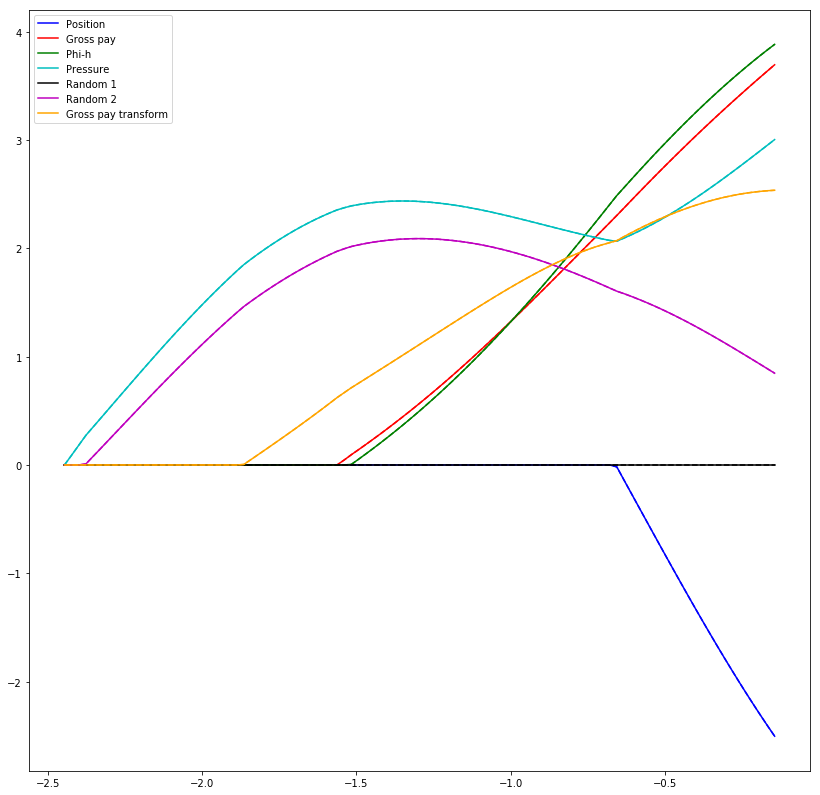

In [23]:
colors = cycle(['b', 'r', 'g', 'c', 'k', 'm', 'Orange'])

plt.figure(figsize = (14, 14))
neg_log_alphas_positive_enet = -np.log10(alphas_positive_enet)
neg_log_alphas_enet = -np.log10(alphas_enet)
# iterate through colours AND labels
for (coef_e, coef_pe, c, l) in zip(coefs_enet, coefs_positive_enet, colors, labels):
    l1 = plt.plot(neg_log_alphas_enet, coef_e, c=c, label=l)
    l2 = plt.plot(neg_log_alphas_positive_enet, coef_pe, linestyle='--', c=c)
plt.legend();

